In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
from wordcloud import WordCloud

In [8]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_json('../Dataset_Clean.json')
print("Cleaned dataset loaded successfully.")
print(f"Shape of the cleaned dataset: {df.shape}")

Cleaned dataset loaded successfully.
Shape of the cleaned dataset: (1935, 9)


In [3]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

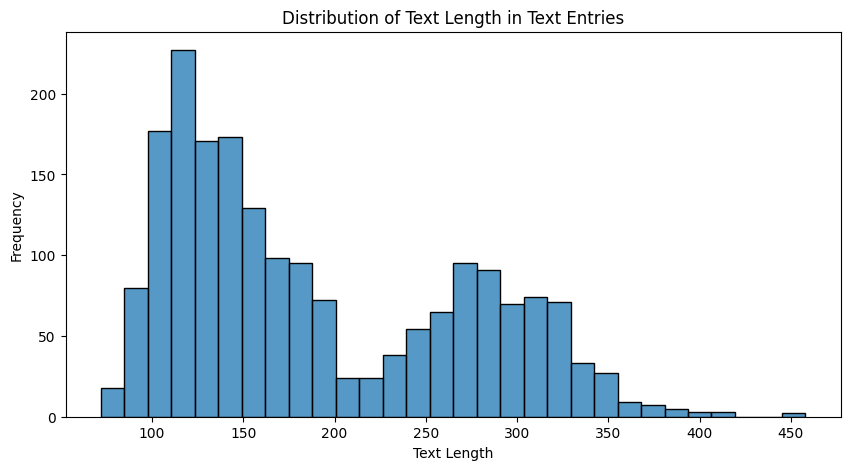

In [5]:
# Plotting with Seaborn for text length
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Text Length in Text Entries')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

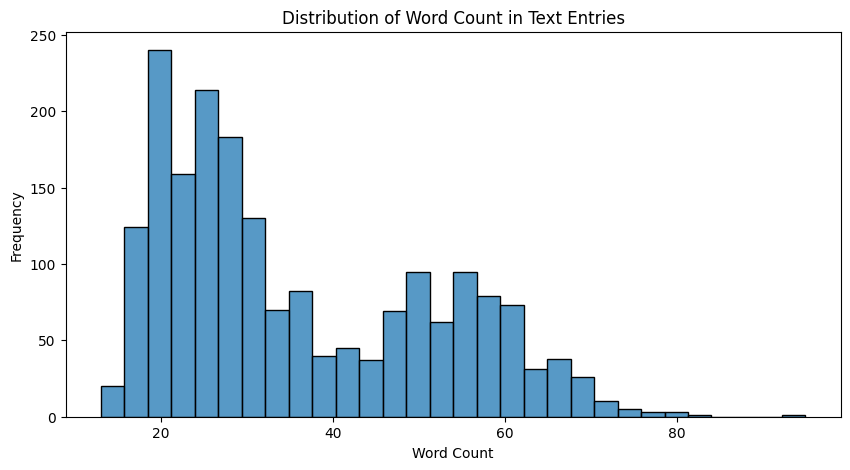

In [6]:
# Plotting with Seaborn for word count
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30)
plt.title('Distribution of Word Count in Text Entries')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Function to clean text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

In [10]:
# Apply the cleaning function and create a list of all words
all_words = df['text'].apply(clean_text).sum()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

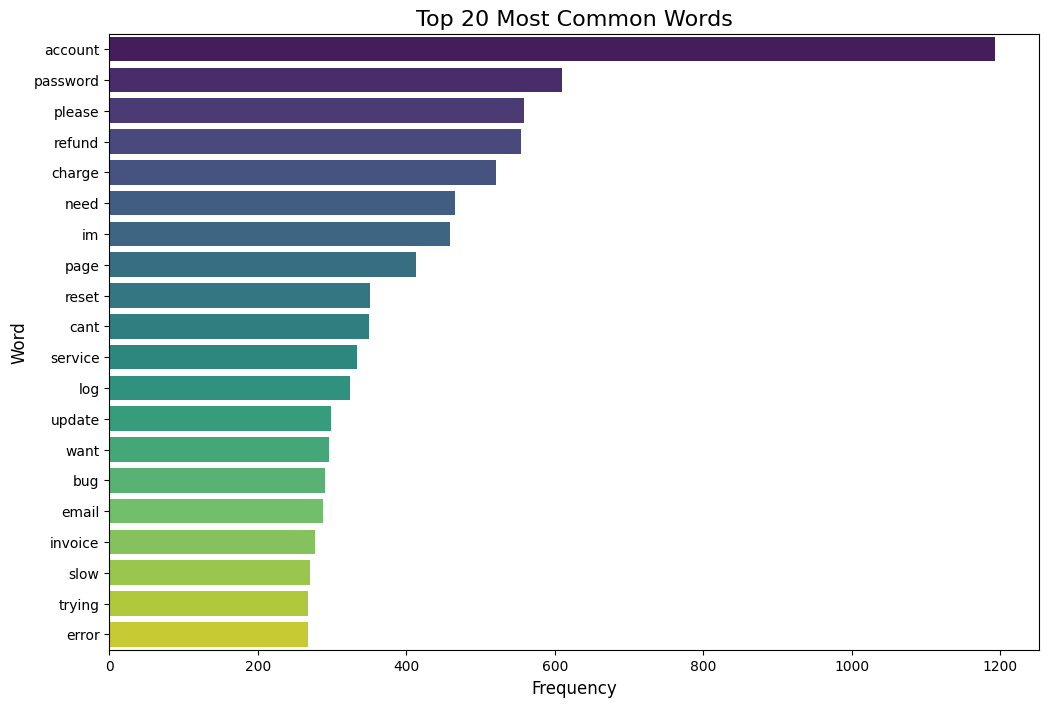

In [11]:
# Plotting the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis', hue='Word', legend=False)
plt.title('Top 20 Most Common Words', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.show()

In [14]:
# Join all the cleaned words back into a single string
text_for_wordcloud = ' '.join(all_words)

# Generate the word cloud
# You can customize width, height, background_color, etc.
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma' # Changed colormap to 'plasma' for vibrancy
).generate(text_for_wordcloud)

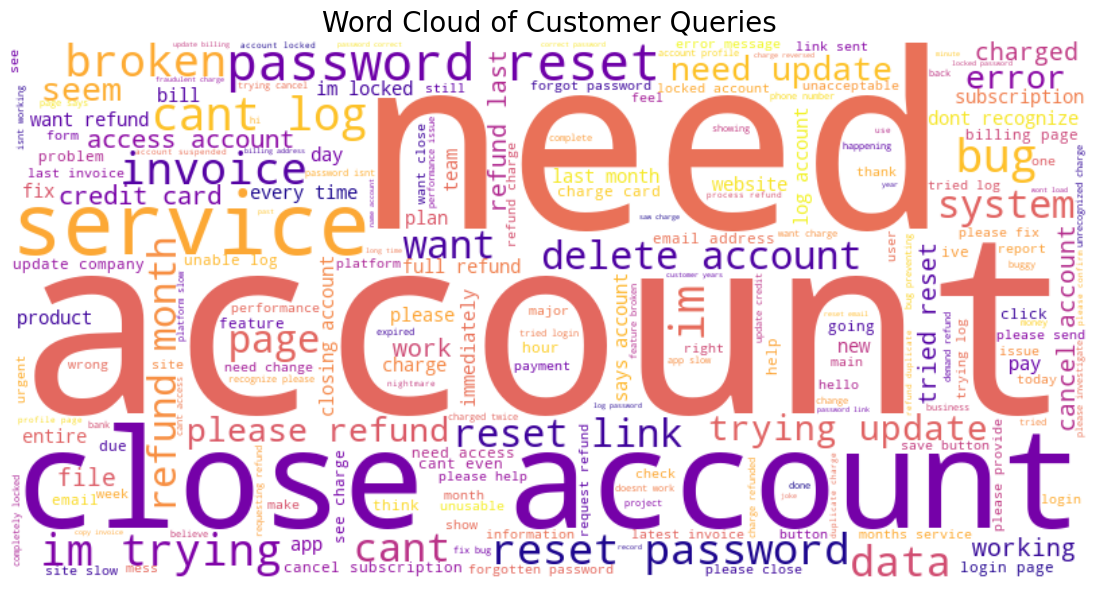

In [15]:
# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Customer Queries', fontsize=20)
plt.show()